# LMMs: Large Multimodal Models with Audio  and Video

🤖 In this introductory notebook, we delve into the versatile capabilities of Gemini large multimodal models (LMMs). The notebook guides you through the process of using Gemini to understand, summarize and transcripe audio and video files effectively. Additionally, it demonstrates how to leverage Gemini for searching and answering user questions, with a focus on reasoning through the responses. This comprehensive guide is ideal for developers and researchers looking to harness the full potential of multimodal functionalities for diverse applications.

By: [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

## Install

In [1]:
!pip install -q -U google-generativeai

## LLM

In [2]:
import google.generativeai as genai
import PIL.Image
import os
from IPython.display import Markdown, display

In [3]:
# Run this cell and paste the API key in the prompt
import os
import getpass
os.environ['GOOGLE_API_KEY'] = getpass.getpass('Gemini API Key:')

Gemini API Key:··········


In [4]:
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [5]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


In [6]:
# Sanity check
!wget -O sample01.jpg http://capreform.eu/wp-content/uploads/2015/10/food_prices_decline-1.jpg

--2024-09-01 15:41:07--  http://capreform.eu/wp-content/uploads/2015/10/food_prices_decline-1.jpg
Resolving capreform.eu (capreform.eu)... 92.205.15.114
Connecting to capreform.eu (capreform.eu)|92.205.15.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166469 (163K) [image/jpeg]
Saving to: ‘sample01.jpg’

sample01.jpg        100%[===================>] 162.57K   593KB/s    in 0.3s    

2024-09-01 15:41:08 (593 KB/s) - ‘sample01.jpg’ saved [166469/166469]



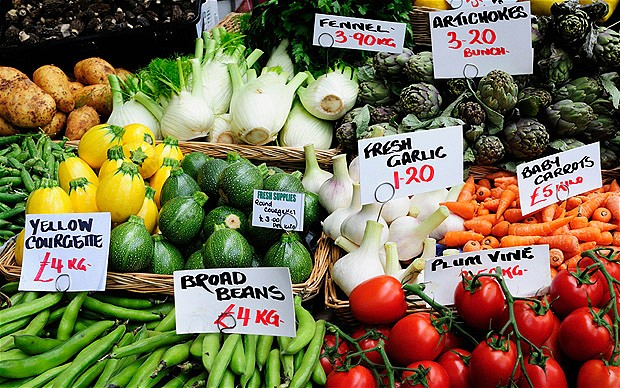

In [7]:
img = PIL.Image.open('/content/sample01.jpg')
display(img)

In [9]:
model = genai.GenerativeModel(model_name="gemini-1.5-flash")
response = model.generate_content(["Given the image, list the items prices", img])

In [10]:
Markdown(response.text)

- Yellow Courgette: £4/kg
- Broad Beans: £4/kg
- Fennel: 3-90/kg
- Artichoke: 3-20/bunch
- Fresh Garlic: 1-20
- Baby Carrots: £5/kilo
- Plum Vine: /kg

## Generation Config

In [11]:
from google.generativeai.types import GenerationConfig

In [12]:
# Creative model
g_config1 = GenerationConfig(
    temperature = 0.85,
    top_p = 0.8
)

# Precise or consistent model
g_config2 = GenerationConfig(
    temperature = 0.0,
    top_k = 1
)

In [13]:
mm_prompt = ["Based on the photo, What is the cheapest food and most healthy that can be constructed from these items? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config1).text)

The cheapest and healthiest food that can be constructed from these items is a salad made with the following ingredients:

* **Yellow Courgette:** This is the cheapest item at £4 per kg. Courgettes are a good source of vitamins, minerals, and fiber.
* **Broad Beans:** These are also relatively cheap at £4 per kg. Broad beans are a good source of protein, fiber, and vitamins.
* **Fennel:** This is a bit more expensive at £3.90 per kg, but it is a very healthy vegetable. Fennel is a good source of vitamins, minerals, and antioxidants.

This salad would be a healthy and filling meal. It is also relatively inexpensive, especially if you buy the courgettes and broad beans in bulk.

It is important to note that this is just one suggestion for a healthy and cheap meal. There are many other possibilities, depending on your individual preferences and budget.

In [14]:
# should expect different output
mm_prompt = ["Based on the photo, What is the cheapest food and most healthy that can be constructed from these items? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config1).text)

The cheapest and healthiest food that can be constructed from the items in the photo is a salad made with the following:

* **Yellow Courgette:** This is the cheapest item in the photo at £4 per kg. It is a good source of vitamins, minerals, and fiber.
* **Broad Beans:** These are also relatively cheap at £4 per kg. They are a good source of protein, fiber, and vitamins.
* **Fennel:** Fennel is a good source of vitamins, minerals, and antioxidants. It is also a good source of fiber, which can help you feel full and satisfied.
* **Garlic:** Garlic is a good source of antioxidants, which can help protect your cells from damage. It is also a good source of vitamins, minerals, and fiber.

This salad would be a healthy and delicious meal that is also budget-friendly.

It is important to note that the price of the items in the photo may vary depending on the location and time of year. However, the salad described above is a good example of a cheap and healthy meal that can be made from the items in the photo.


In [15]:
mm_prompt = ["Based on the photo, What is the cheapest food and most healthy that can be constructed from these items? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config2).text)

The cheapest and healthiest food that can be constructed from these items is a salad with **broad beans**, **yellow courgette**, and **fennel**. 

Here's why:

* **Cheapest:** Broad beans and yellow courgette are the cheapest items in the photo, priced at £4/kg each. Fennel is also relatively affordable at £3.90/kg.
* **Healthiest:** This combination provides a good source of fiber, vitamins, and minerals. Broad beans are a good source of protein, while yellow courgette is rich in vitamin C and potassium. Fennel is known for its digestive benefits and contains antioxidants.

While other items like garlic and tomatoes are also healthy, they are more expensive than the chosen ingredients. 


In [16]:
# should expect almost same output
mm_prompt = ["Based on the photo, What is the cheapest food and most healthy that can be constructed from these items? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config2).text)

The cheapest and healthiest food that can be constructed from these items is a salad with **broad beans**, **yellow courgette**, and **fennel**. 

Here's why:

* **Cheapest:** Broad beans and yellow courgette are the cheapest items in the photo, priced at £4/kg each. Fennel is also relatively affordable at £3.90/kg.
* **Healthiest:** This combination provides a good source of fiber, vitamins, and minerals. Broad beans are a good source of protein, while yellow courgette is rich in vitamin C and potassium. Fennel is known for its digestive benefits and contains antioxidants.

While other items like garlic and tomatoes are also healthy, they are more expensive than the chosen ingredients. 


## Audio  

In [17]:
!wget -O audio.mp3 https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3

--2024-09-01 15:43:08--  https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41762063 (40M) [audio/mpeg]
Saving to: ‘audio.mp3’

audio.mp3           100%[===================>]  39.83M  75.5MB/s    in 0.5s    

2024-09-01 15:43:08 (75.5 MB/s) - ‘audio.mp3’ saved [41762063/41762063]



In [18]:
audio_file = genai.upload_file(path='/content/audio.mp3')

### Summarize

In [19]:
prompt = "Listen carefully to the following audio file. Provide a brief summary in around 200 words."
response = model.generate_content([prompt, audio_file])
Markdown(response.text)

President John F. Kennedy delivered his State of the Union address to a joint session of Congress on January 30th, 1961. He acknowledged the difficult economic situation, with high unemployment, low farm income, and a struggling economy. He outlined his plan to address these issues, focusing on stimulating economic growth, improving unemployment compensation, and promoting housing and construction. 

Kennedy also acknowledged the international challenges facing the United States, particularly the Cold War and the growing influence of communism. He emphasized the need to strengthen the military, support international organizations like the United Nations, and work towards peaceful coexistence. He highlighted the importance of a strong economy for national security and international influence. Finally, Kennedy stressed the need for a new era of public service with increased dedication and responsibility.  


### Search

In [20]:
prompt1 = "Listen carefully to the following audio file. Provide a brief summary."
prompt2 = """
Determine exactly where in the audio the Kennedy proposed a new aid program to help countries outside of the United States .
"""
response = model.generate_content([prompt1, audio_file, prompt2])
Markdown(response.text)  # 28:46

The new aid program proposal can be found at 28:45.  The audio states, "I intend to ask the Congress for authority to establish a new and more effective program for assisting the economic, educational and social development of other countries and continents."


### Inline and transcripe

For small requests you can inline the audio data into the request. Use PyDub to trim the first seconds of the audio

In [21]:
!pip install -Uq pydub

In [22]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("/content/audio.mp3")
sound[:15000] # slices are in ms

In [23]:
response = model.generate_content([
    "Please transcribe this recording:",
    {
        "mime_type": "audio/mp3",
        "data": sound[:15000].export().read()
    }
])

Markdown(response.text)
#The President's State of the Union address to a joint session of the Congress from the rostrum of the House of Representatives Washington DC January 30th 1961.

The President's State of the Union address to a joint session of the Congress from the rostrum of the House of Representatives Washington DC January 30th 1961 

## Video

In [24]:
!wget -O video.mp4 http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/TearsOfSteel.mp4

--2024-09-01 15:47:14--  http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/TearsOfSteel.mp4
Resolving commondatastorage.googleapis.com (commondatastorage.googleapis.com)... 142.251.167.207, 142.251.16.207, 172.253.62.207, ...
Connecting to commondatastorage.googleapis.com (commondatastorage.googleapis.com)|142.251.167.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185765954 (177M) [video/mp4]
Saving to: ‘video.mp4’

video.mp4           100%[===================>] 177.16M   177MB/s    in 1.0s    

2024-09-01 15:47:15 (177 MB/s) - ‘video.mp4’ saved [185765954/185765954]



In [27]:
print("Uploading file...")
video_file = genai.upload_file(path='/content/video.mp4')
print("Completed upload")

Uploading file...
Completed upload


### Summarize

In [28]:
prompt = "Summarize this video in  a short 200 words paragraph."
response = model.generate_content([prompt, video_file], request_options={"timeout": 600})
Markdown(response.text)

The video "Tears of Steel" is a short film produced by Blender Institute. It tells the story of a young man, Thom, who is obsessed with space exploration.  He builds a giant robot, Celia, and  leaves Earth. 40 years later, the robot returns, seemingly unchanged but with its memories synced with Thom's. The video explores the themes of love, loss, and the consequences of pursuing one's passions.  It was created using Blender and won awards at the Seattle International Film Festival and the Future Film Festival in Bologna. 


### Ask your video

In [30]:
prompt1 = "Undertand the video."
prompt2 = """
Answer the following questions:
1) List the main chars.
2) What is the plot twist.
3) What is the main message of the video.

Make the output in markdown format
"""
response = model.generate_content([prompt1, video_file, prompt2], request_options={"timeout": 600})
Markdown(response.text)

The short film "Tears of Steel" is a science fiction tale with a focus on the relationship between humans and robots. 

Here are the main characters: 

- **Celia**: A female robot with a passion for robotics.
- **Thom**: A human male, interested in space and the stars, who is in love with Celia. 
- **Barley**:  A human male who becomes a prominent figure in the robot uprising. 

The plot twist is that Celia, the robot with whom Thom was in love, rises up against humanity as the leader of a robot revolution.

The main message of the video is that even in a world of advanced technology and artificial intelligence, human emotions like love, loss, and betrayal remain at the heart of the story. The conflict between humans and robots is driven by the choices and actions of individuals, highlighting the complexities of human nature and the potential for both good and evil. 


### Search

In [31]:
prompt1 = "Undertand the video."
prompt2 = """
1) Where exactly in the video a box of mango juice appreared?
2) Describe the person who was drinking the juice.

make your reponse in a markdown format.
"""
response = model.generate_content([prompt1, video_file, prompt2], request_options={"timeout": 600})
Markdown(response.text)
# The box of mango juice appeared at 0:26.
# It was a young male with a black jacket.

The box of mango juice appears at 0:26 in the video.
The person drinking the juice is a young man with a dark complexion, wearing a blue jacket.



### Multi image, audio and video with reasoning

Work in progress


images source: https://pixabay.com/illustrations/scifi-sci-fi-spaceship-future-8082251/


In [32]:
!wget -O scifi.jpg https://cdn.pixabay.com/photo/2023/06/22/21/00/scifi-8082251_1280.jpg

--2024-09-01 15:53:24--  https://cdn.pixabay.com/photo/2023/06/22/21/00/scifi-8082251_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246146 (240K) [image/jpeg]
Saving to: ‘scifi.jpg’

scifi.jpg           100%[===================>] 240.38K  --.-KB/s    in 0.006s  

2024-09-01 15:53:24 (41.7 MB/s) - ‘scifi.jpg’ saved [246146/246146]



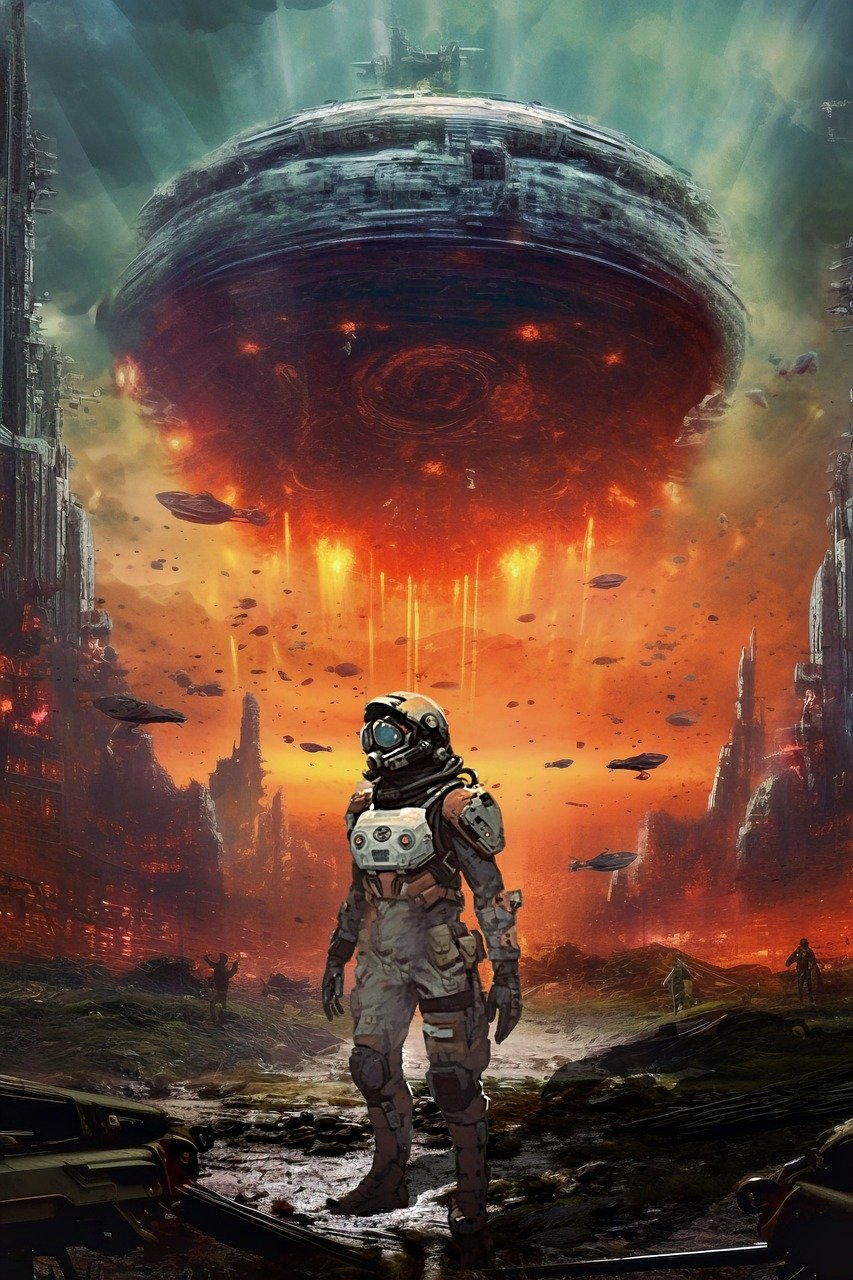

In [33]:
img = PIL.Image.open('/content/scifi.jpg')
display(img)

In [34]:
prompt1 = "Undertand the video."
prompt2 = "How the following image is related to the video? explain your answer."
prompt3 = "Make your response in markdown format."

response = model.generate_content([prompt1, video_file, prompt2, img, prompt3], request_options={"timeout": 600})
Markdown(response.text)

The image is related to the video because it depicts a dystopian future, similar to the one seen in the video. Both the image and the video feature a destroyed city and a futuristic robot. The video showcases a robot which takes control of a city while the image depicts an astronaut standing in a destroyed city after a bombing. 


In [35]:
prompt1 = "Undertand the audio."
prompt2 = "Undertand the video."
prompt3 = "What can be common between the audio and the video where actions of the past may afect the future. explain your answer."
prompt4 = "Make your response in markdown format."

response = model.generate_content([prompt1, audio_file, prompt2, video_file, prompt3, prompt4], request_options={"timeout": 6600})
Markdown(response.text)

The audio and video share the theme of actions of the past affecting the future. 

Here's how:

* **Audio:**  The audio is a speech by President John F. Kennedy, where he discusses the state of the nation and outlines his vision for the future. He emphasizes the importance of addressing past challenges and making decisions that ensure a brighter future for the country.
* **Video:** The video is a short film about a giant robot that has been activated by the actions of a young man in the past. The film shows how his past actions have consequences and lead to a dystopian future.

Both the audio and video show that past decisions, whether on a grand political scale (like Kennedy's speech) or a personal level (like the young man in the video), have significant impacts on the future. 
